In [4]:
import os
import math
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt


Part A
This table shows the most popular songs since 1958 (along with the artist) by the number of weeks they appeared on the Billboard Top 100 list.

In [6]:
#import file and pull relevant columns
billboard = pd.read_csv('billboard.csv')
billboard = billboard[['performer','song','year','week','week_position']]
#pull in performer and song and sort on values
song_count = pd.DataFrame(billboard[['performer','song']].value_counts())
#print top 10 results
song_count[:10]

,,count
performer,song,
Imagine Dragons,Radioactive,87
AWOLNATION,Sail,79
The Weeknd,Blinding Lights,76
Jason Mraz,I'm Yours,76
LeAnn Rimes,How Do I Live,69
OneRepublic,Counting Stars,68
LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
Jewel,Foolish Games/You Were Meant For Me,65
Adele,Rolling In The Deep,65


Part B:
This code shows the number of songs that appeared in the Billboard Hot 100 from 1959 to 2020.


In [ ]:
#exclude 1958 and 2021
exclusion_years = [1958, 2021]
billboard_exclude = billboard[~billboard['year'].isin(exclusion_years)]
#billboard_exclude[:40]

#group by years, remove song duplicates by year
billboard_diversity = billboard_exclude[['year','song']].drop_duplicates()
plot_df = billboard_diversity['year'].value_counts()
plot_df = plot_df.sort_index()

plot_df.plot(kind = 'line', title = 'Song Diversity per Year', xlabel = 'year', ylabel = 'count')

# Part C

### This plot shows the 19 artists in U.S. musical history who have had at least 30 "ten-week hits" and the number of ten week hits they have

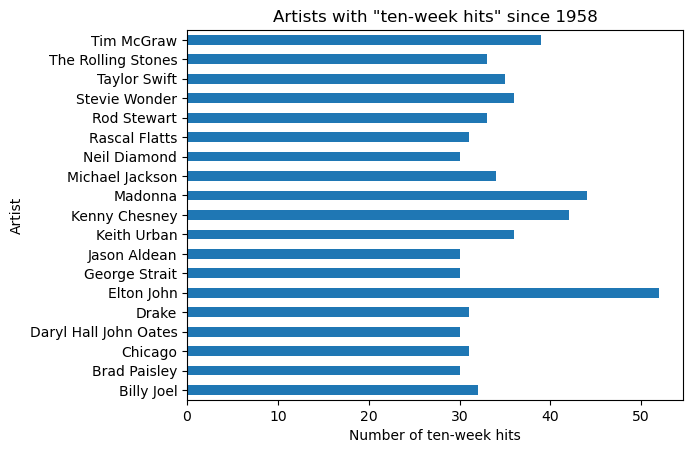

In [9]:
temp = billboard.groupby(["performer", "song"]).nunique()["week"]
temp2 = temp[temp >= 10].unstack("performer").count()
temp2[temp2 >= 30].plot(kind = "barh")
plt.title('Artists with "ten-week hits" since 1958')
plt.xlabel('Number of ten-week hits')
plt.ylabel('Artist')
plt.show()